# Decision Tree Algorithms and Ensemble Methods
In this mini-project, Decision Tree algorithms and Ensemble Methods:-
1. Bagging (random forest) 
2. Boosting (ada boost), and 
3. Stacking (staking classifier) 

are applied to the Credit Card Fraud Detection dataset [https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud] and the performance of each method compared. The dataset contains credit card transactions, where the focus is to predict whether a transaction is fraudulent or not.

The steps undertaken are:
- Step 1: Data Exploration and Visualization
- Step 2: Data Preprocessing
- Step 3: Implementation of Decision Tree Classifier
- Step 4: Implementation of Random Forest Classifier (Bagging)
- Step 5: Implementation of AdaBoost Classifier (Boosting)
- Step 6: Implementation of Stacking Classifier (Stacking)
- Step 7: Model Evaluation and Comparison

## Step 1: Data Exploration and Visualization
Libraries for data manipulation, model training and visualization are imported.

In [1]:
# import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load the dataset
df = pd.read_csv('/Users/bett/downloads/creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Explore the Dataset
- displaying basic information
- analyzing the distribution of target variable (fraudulent or not)
- visualizing the relationships between features using correlation matrices, pairplots and histograms

In [3]:
# information of the variables
print("Information of the variables")
print(df.info())

Information of the variables
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-

In [4]:
# print basic statistics
print("Basic statistics of the dataset")
print(df.describe())

Basic statistics of the dataset
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.175161e-15  3.384974e-16 -1.379537e-15  2.094852e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.021879e-15  1.494498e-15 -5.620335e-16  1.149614e-16 -2.414189e-15   
std    1.3

In [5]:
# print number of rows and columns
print("Number of rows and columns in the dataset:")
print(df.shape)

Number of rows and columns in the dataset:
(284807, 31)


In [6]:
# check for missing values
print("Missing values in the dataset:")
print(df.isnull().sum())

Missing values in the dataset:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [7]:
# check for duplicate rows and remove them
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")
if duplicate_rows > 0:
    df = df.drop_duplicates()
    print(f"Duplicate rows removed. New shape of the dataset: {df.shape}")

Number of duplicate rows: 1081
Duplicate rows removed. New shape of the dataset: (283726, 31)


In [8]:
# analyze the target variable
print("Distribution of the target variable:")
print(df['Class'].value_counts())

Distribution of the target variable:
Class
0    283253
1       473
Name: count, dtype: int64


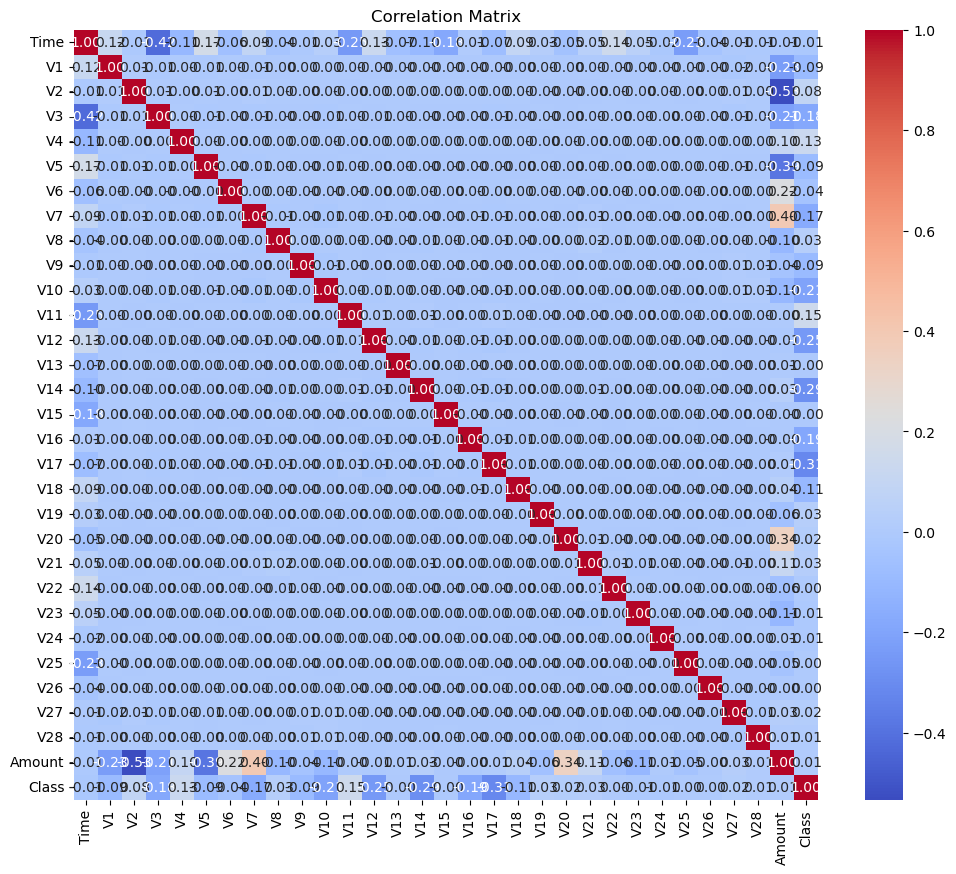

In [9]:
# visualize the relationship between features using correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

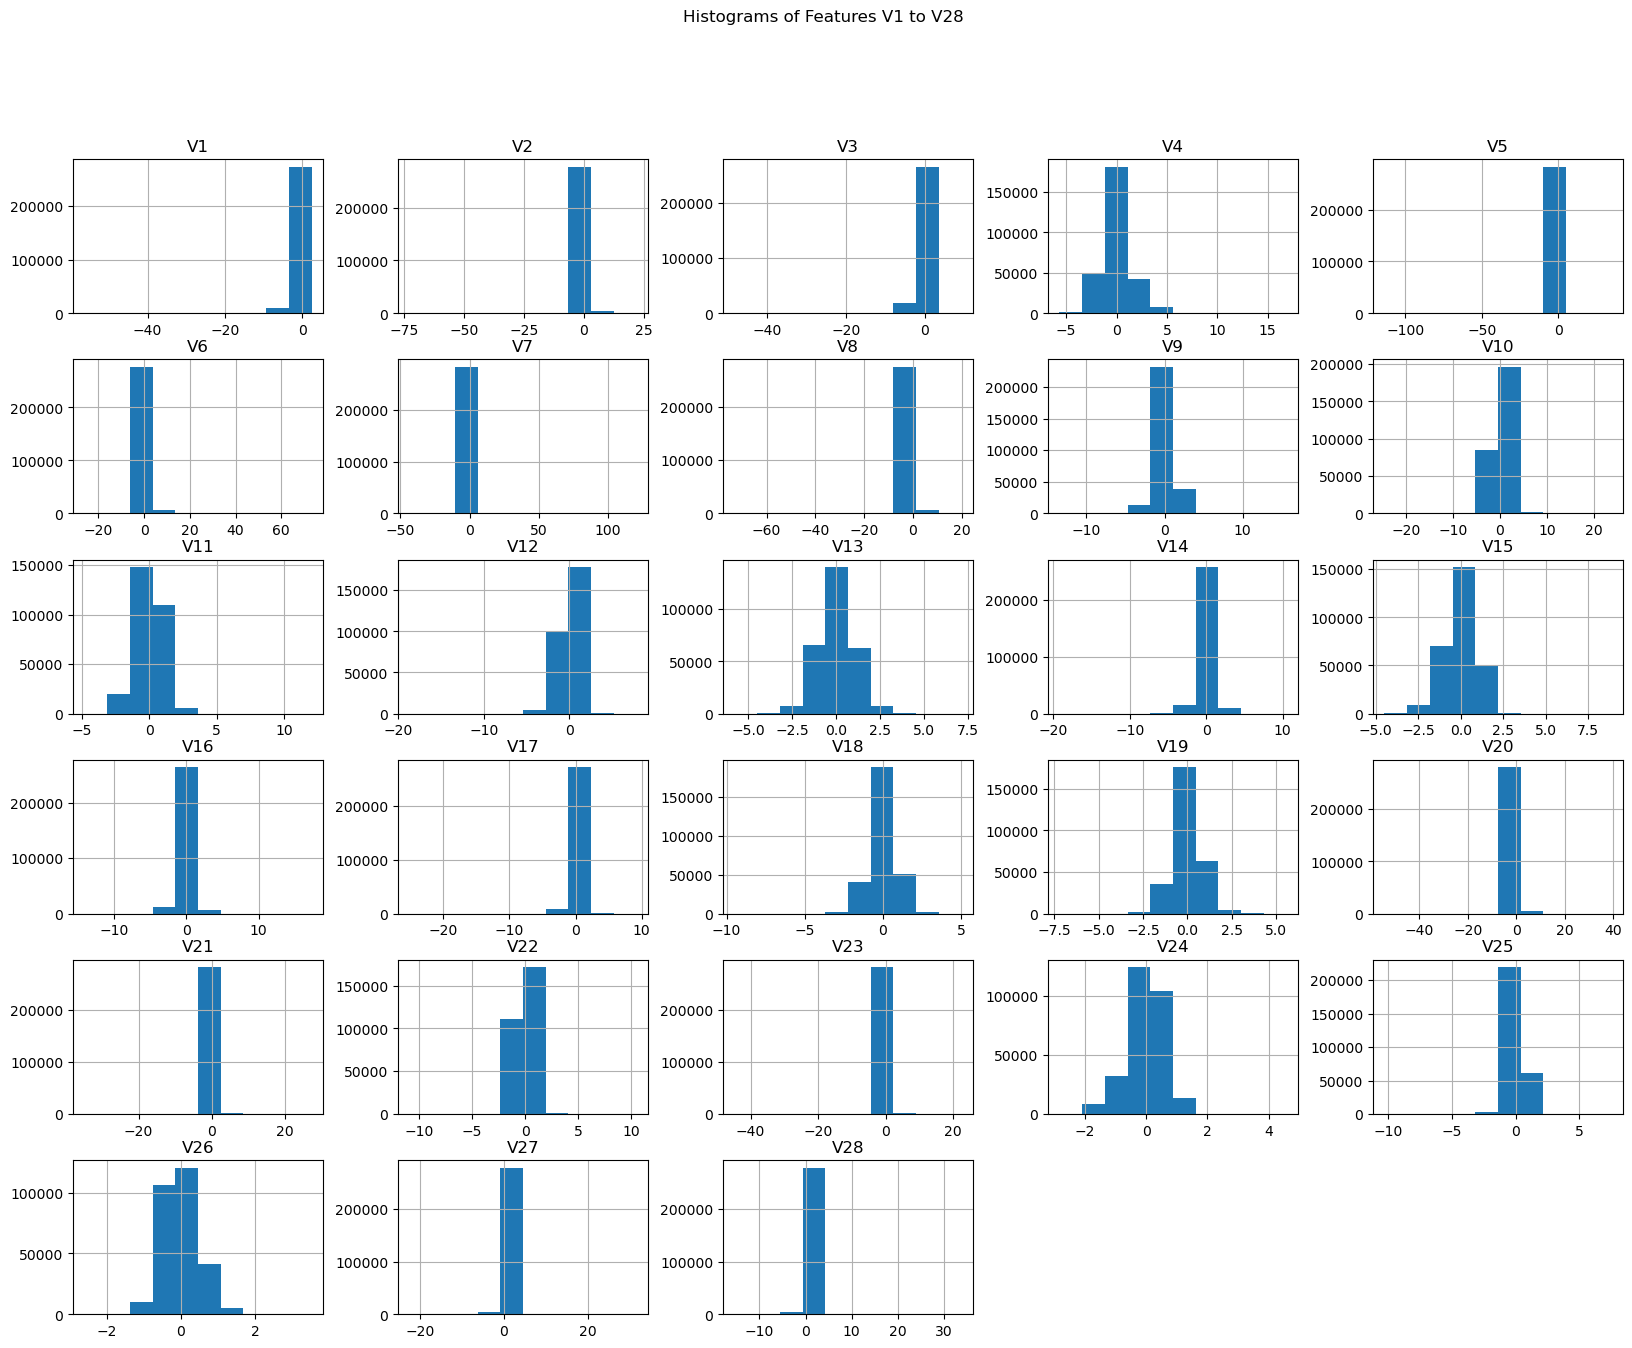

In [10]:
# histograms of features V1 to V28
df.hist(column=[f'V{i}' for i in range(1, 29)], figsize=(20, 15))
plt.suptitle('Histograms of Features V1 to V28')
plt.show()

## Step 2: Data Preprocessing
- Data Splitting
- Handling missing values
- Data Scaling

In [11]:
# split the dataset into training and testing sets
'''
Split the dataset into features and target variable first, then into training and testing sets.
'''
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 3: Implementing Decision Tree Classifier

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.67      0.71      0.69        90

    accuracy                           1.00     56746
   macro avg       0.83      0.86      0.84     56746
weighted avg       1.00      1.00      1.00     56746

Accuracy: 0.9990


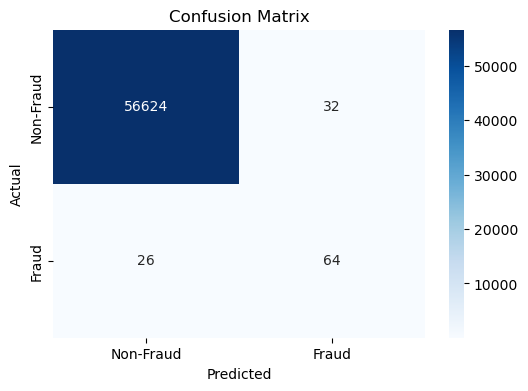

In [37]:
# handle missing values if any (not needed here as there are no missing values)
# data scaling (not needed here as Decision Trees are not affected by feature scaling)
# train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
#classification report
from sklearn.metrics import classification_report
dt_classification_report = classification_report(y_test, y_pred)
print("Decision Tree Classification Report:")
print(dt_classification_report)

print(f'Accuracy: {accuracy:.4f}')
# visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

## Step 4: Implementing Random Forest Classifier (Bagging)

Random Forest Accuracy: 0.9995
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.73      0.84        90

    accuracy                           1.00     56746
   macro avg       0.99      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746



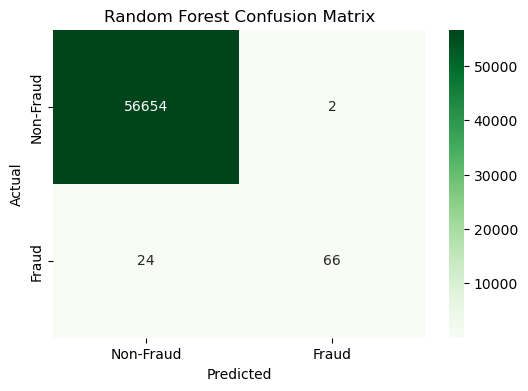

In [35]:
# data scaling for random forest
# import StandardScaler, RandomForestClassifier and classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# make predictions with Random Forest
y_rf_pred = rf_model.predict(X_test_scaled)

# evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, y_rf_pred)
rf_conf_matrix = confusion_matrix(y_test, y_rf_pred)
rf_classification_report = classification_report(y_test, y_rf_pred)

# print Random Forest results
print(f'Random Forest Accuracy: {rf_accuracy:.4f}')
print('Classification Report:')
print(rf_classification_report)

# visualize the Random Forest confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Random Forest Confusion Matrix')
plt.show()

## Step 5: Implementing AdaBoost Classifier (Boosting)

In [14]:
# use the scaled data
# train AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
adb_model = AdaBoostClassifier(random_state=42)
adb_model.fit(X_train_scaled, y_train)

,"estimator estimator: object, default=NoneThe base estimator from which the boosted ensemble is built.Support for sample weighting is required, as well as proper``classes_`` and ``n_classes_`` attributes. If ``None``, thenthe base estimator is :class:`~sklearn.tree.DecisionTreeClassifier`initialized with `max_depth=1`... versionadded:: 1.2 `base_estimator` was renamed to `estimator`.",None
,"n_estimators n_estimators: int, default=50The maximum number of estimators at which boosting is terminated.In case of perfect fit, the learning procedure is stopped early.Values must be in the range `[1, inf)`.",50
,"learning_rate learning_rate: float, default=1.0Weight applied to each classifier at each boosting iteration. A higherlearning rate increases the contribution of each classifier. There isa trade-off between the `learning_rate` and `n_estimators` parameters.Values must be in the range `(0.0, inf)`.",1.0
,"random_state random_state: int, RandomState instance or None, default=NoneControls the random seed given at each `estimator` at eachboosting iteration.Thus, it is only used when `estimator` exposes a `random_state`.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",42


In [15]:
# make predictions with AdaBoost
y_adb_pred = adb_model.predict(X_test_scaled)

In [38]:
# evaluate the AdaBoost model
adb_accuracy = accuracy_score(y_test, y_adb_pred)
adb_conf_matrix = confusion_matrix(y_test, y_adb_pred)
adb_classification_report = classification_report(y_test, y_adb_pred)
# print AdaBoost classification report
print("AdaBoost Classification Report:")
print(adb_classification_report)

AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.79      0.68      0.73        90

    accuracy                           1.00     56746
   macro avg       0.90      0.84      0.87     56746
weighted avg       1.00      1.00      1.00     56746



AdaBoost Accuracy: 0.9992


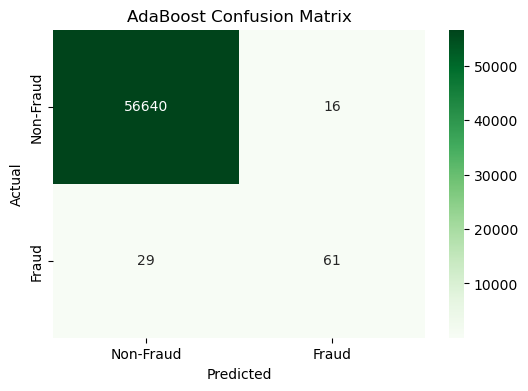

In [33]:
# print AdaBoost results
print(f'AdaBoost Accuracy: {adb_accuracy:.4f}')

# visualize the AdaBoost confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(adb_conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('AdaBoost Confusion Matrix')
plt.show()

## Step 6: Implementing Stacking Classifier (Stacking)

In [18]:
#load packages
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

In [19]:
# initialize base learners
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

# create base learners
estimators = [
    ('rf', rf_regressor),
    ('gb', gb_regressor),
]

In [20]:
# create the stacking regressor using linear regression as the final estimator
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression()
)

In [21]:
# create the stacking model
stacking_model.fit(X_train_scaled, y_train)
#make predictions
y_pred_stacking = stacking_model.predict(X_test_scaled)

In [22]:
#evaluate the model
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
r2 = stacking_model.score(X_test_scaled, y_test)
print(f'Stacking Regressor MSE: {mse_stacking:.4f}')
print(f'Stacking Regressor R^2: {r2:.4f}')

Stacking Regressor MSE: 0.0005
Stacking Regressor R^2: 0.7078


## Step 7: Compare All the Models

In [43]:
# compare all the models' performance
model_performance = {
    'Decision Tree Accuracy': accuracy,
    'Random Forest Accuracy': rf_accuracy,
    'AdaBoost Accuracy': adb_accuracy,
    'Stacking Regressor R^2': r2,   # Using R^2 score for stacking
    'Stacking Regressor MSE': mse_stacking

}

# print model performance in table format
for model, performance in model_performance.items():
    print(f"{model}: {performance:.4f}")
          
#print classification reports for all models
print("Decision Tree Classification Report:")
print(dt_classification_report)
print("Random Forest Classification Report:")
print(rf_classification_report)
print("AdaBoost Classification Report:")
print(adb_classification_report)

Decision Tree Accuracy: 0.9990
Random Forest Accuracy: 0.9995
AdaBoost Accuracy: 0.9992
Stacking Regressor R^2: 0.7078
Stacking Regressor MSE: 0.0005
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.67      0.71      0.69        90

    accuracy                           1.00     56746
   macro avg       0.83      0.86      0.84     56746
weighted avg       1.00      1.00      1.00     56746

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.73      0.84        90

    accuracy                           1.00     56746
   macro avg       0.99      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746

AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00  

The report presents performance metrics for several machine learning models on a highly imbalanced binary classification dataset with 56,746 total samples, where the majority class (label 0) comprises 56,656 instances and the minority class (label 1) only 90 instances. All three classification models—Decision Tree, Random Forest, and AdaBoost—achieve near-perfect overall accuracy (0.9990, 0.9995, and 0.9992 respectively), but this is largely driven by excellent performance on the majority class, with precision, recall, and F1-score of 1.00 for class 0 across all models. For the critical minority class, performance varies significantly: Random Forest performs best with a precision of 0.97, recall of 0.73, and F1-score of 0.84; Decision Tree follows with precision 0.67, recall 0.71, and F1-score 0.69; while AdaBoost lags with precision 0.79, recall 0.68, and F1-score 0.73. 

The inclusion of regression metrics—a Stacking Regressor with an R^2 of 0.7078 and a very low MSE of 0.0005—suggests that while the classification of categories is highly successful, the model also maintains a decent level of predictive power for continuous target variables, though there is still room for improvement in explaining the total variance.